## **Set up and importing libraries**

In [1]:
# importing libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## **Download Dataset - Covid19 deaths and vaccinations**

In [2]:
# downloading dataset (covid19 data deaths and vaccinations) and presenting first 5 rows
file_path = "../input/covid19-data-deaths-and-vaccinations/covid_data_cleaned.csv"
my_data = pd.read_csv(file_path, parse_dates = True)
# Displaying first few rows of data
my_data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations
0,AFG,Asia,Afghanistan,24/02/20,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Missing Values**

In [3]:
# Checking for missing values in all columns
my_data.isnull().sum()

iso_code                        0
continent                   10723
location                        0
date                            0
total_cases                  6838
new_cases                    7051
total_deaths                25116
new_deaths                  25119
total_vaccinations         133572
people_vaccinated          136019
people_fully_vaccinated    138517
total_boosters             161152
new_vaccinations           142523
dtype: int64

## **Size of dataset**

In [4]:
# How many rows and columns are in the downloaded dataset
my_data.shape

(183583, 13)

## **Filter to include only most recent date**

In [5]:
# How many different dates are in the downloaded dataset?
print(f'Number of different dates: {my_data.date.nunique()}')
# What is the last (most recent) date in the downloaded dataset?
print(f'Most recent date: {my_data.date.max()}')

Number of different dates: 854
Most recent date: 31/12/21


In [6]:
# We will filter the data to look at data from the most recent date only.
my_data2 =  my_data[my_data.date == my_data.date.max()]
# display the first 5 rows of the dataset for the most recent date.
my_data2.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations
676,AFG,Asia,Afghanistan,31/12/21,158084.0,28.0,7356.0,0.0,NaN,NaN,NaN,NaN,NaN
1487,OWID_AFR,NaN,Africa,31/12/21,9756168.0,52550.0,228453.0,241.0,303508220.0,193654677.0,125198111.0,892142.0,2944695.0
2286,ALB,Europe,Albania,31/12/21,210224.0,1325.0,3217.0,5.0,NaN,NaN,NaN,NaN,NaN
3085,DZA,Africa,Algeria,31/12/21,218432.0,395.0,6276.0,5.0,NaN,NaN,NaN,NaN,NaN
3878,AND,Europe,Andorra,31/12/21,23740.0,618.0,140.0,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# For this analysis I am going to remove all rows that contain at least one missing value
# clean_data = my_data.dropna()

# How many rows and columns in the cleaned dataset after removing all rows containing missing values
# clean_data.shape

In [8]:
# Names of columns in the dataset
my_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations'],
      dtype='object')

In [9]:
# I am going to first drop all the columns I don't use, 
# and then drop rows with NAs, in order to reduce the amount of lossed data.

In [10]:
# cols = ["continent", "total_cases", "total_vaccinations"]
# continent_data1 = my_data[cols]
# clean_data1 = continent_data1.dropna()
#Printing the size of original data after dropping columns, and of cleaned data
#print("Size of original continent data:", continent_data.shape,\
#     "\n", "-"*45, "\n", "Size of cleaned data:",\
#     clean_data1.shape, "\n", "-"*45, "\n",\
#      "Size of cleaned data without removing columns:", clean_data.shape)
# We see that in comparison to the original clean data (14602 rows), we now
# retain more data (43757 rows). We will continue now the analysis using 
# the df "clean_data1" which retains more rows of data in comparison with 
# the original "clean_data" df.

## **Remove missing values**

In [11]:
# I am now going to use my_data2, which contains data for the most recent
# date (31/12/21) only.
cols = ["continent", "location", "total_cases", "total_vaccinations"]
continent_data2 = my_data2[cols]
clean_data2 = continent_data2.dropna()
#Printing the size of original data after dropping columns, and of cleaned data
print("Size of original continent data for the most recent date (31/12/2021):",\
      continent_data2.shape,\
     "\n", "-"*78, "\n", "Size of cleaned data:",\
     clean_data2.shape)
# We now have 81 rows, in comparison with the original dataset for 31/12/21
# which had 238 rows.

Size of original continent data for the most recent date (31/12/2021): (238, 4) 
 ------------------------------------------------------------------------------ 
 Size of cleaned data: (81, 4)


In [12]:
# How many rows for each country, and how many unique countries in the dataset
# before and after removing rows with missing values
print("Number of countries:\n", "-"*25, "\n",\
      "Raw data:", my_data.location.nunique(),\
      "\n", "-"*25, "\n", "Clean data:",\
      clean_data2.location.nunique())

# There are 243 unique countries in the dataset before remvoing missing values, 
# and 81 unique countries after removing all rows with missing values

Number of countries:
 ------------------------- 
 Raw data: 243 
 ------------------------- 
 Clean data: 81


## **Processing**

In [13]:
# Processing the clean dataset in order to show total cases and total vaccinations per continent
# (in Millions)
continent_data = clean_data2.groupby("continent")["continent", "total_cases",
                                                 "total_vaccinations"].sum()/1000000
continent_data = continent_data.astype(float)
continent_data.reset_index(inplace = True)

continent_data.columns = ["Continent", "Total cases (Millions)", "Total vacc. (Millions)"]
continent_data.sort_values(by = "Total vacc. (Millions)", inplace = True)

# Setting display style for float values as commas, no decimal places.
pd.options.display.float_format = '{:,.2f}'.format

# Displaying the processed dataset.
display(continent_data)

# Displaying the type of the columns in the dataset.
display(continent_data.dtypes)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Continent,Total cases (Millions),Total vacc. (Millions)
4,Oceania,0.01,8.19
0,Africa,2.10,62.63
5,South America,38.77,613.73
3,North America,59.23,645.66
2,Europe,72.23,930.19
1,Asia,61.14,"5,195.89"


Continent                  object
Total cases (Millions)    float64
Total vacc. (Millions)    float64
dtype: object

## **Data Visualization of the Results**

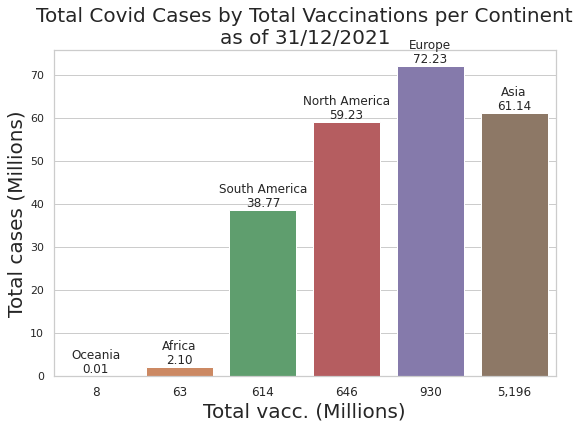

In [14]:
# Creating a bar graph for total cases vs. total vaccinations per continent.

# Setting options and style.
pd.options.display.float_format = '{:,.2f}'.format
plt.figure(figsize = (9,6))
sns.set(font_scale = 1)
sns.set_style("whitegrid")

# Setting the title.
plt.title("Total Covid Cases by Total Vaccinations per Continent\nas of 31/12/2021",\
          fontsize = 20)

# Creating a bar plot.
s = sns.barplot(data = continent_data, x = "Total vacc. (Millions)", 
                y = "Total cases (Millions)")
s.set_xticklabels(labels = continent_data["Total vacc. (Millions)"].map('{:,.0f}'.format), size = 12)
#s.set_yticklabels(labels = continent_data["Total cases (Millions)"]\
 #                 .map('{:,.0f}'.format.sort_values()), size = 12)

# Setting bar labels as continent names.
plt.bar_label(s.containers[0], labels = continent_data["Continent"], padding = 14)
# Setting bar labels with values of total cases.
plt.bar_label(s.containers[0], labels = continent_data["Total cases (Millions)"]\
                 .map('{:,.2f}'.format), padding = 0)
# Setting x and y axes' labels and size.
s.set_xlabel("Total vacc. (Millions)", size = 20)
s.set_ylabel("Total cases (Millions)", size = 20)

plt.show()

# Saving the figure.
fig = s.get_figure()
fig.savefig("figure.png")


## **Summary**

The graph above presents the results of analysing this covid dataset, for the most recent date present in the dataset: 31/12/2021. The graph shows a relationship between the number of total vaccinations per continent and the number of total cases per continent. A greater number of vaccinations is associated with a greater number of total cases for all continents, except for Asia. Asia has the largest number of total vaccinations by far, yet its number of total cases is lower in comparison with Europe for instance. 
  
***Please note***: Missing values have been removed from this dataset, which may have affected the results as presented in the graph above. Also please note the scale of the X-axis is not adjusted.